In [1]:
import numpy as np
import pandas as pd

## Timestamp Object
#### Time stamps reference particular moments in time (e.g., Oct 24th, 2022 at 7:00pm)

In [2]:
# creating a timestamp
pd.Timestamp('2024/8/17') # year month day

Timestamp('2024-08-17 00:00:00')

In [3]:
# variations
pd.Timestamp('2024, 8, 17')
# pd.Timestamp('2024-8-17')

Timestamp('2024-08-17 00:00:00')

In [4]:
# only year
pd.Timestamp('2024')

Timestamp('2024-01-01 00:00:00')

In [5]:
# using text
pd.Timestamp('17th August 2024')

Timestamp('2024-08-17 00:00:00')

In [6]:
# providing time also
pd.Timestamp('17th August 2024 9:21AM')

Timestamp('2024-08-17 09:21:00')

In [7]:
pd.Timestamp('2024-08-17 12:56:00')

Timestamp('2024-08-17 12:56:00')

### why separate objects to handle data and time when python already has datetime functionality?
- syntax wise datetime is very convenient
- But the performance takes a hit while working with huge data. List vs Numpy Array
- The weaknesses of Python's datetime format inspired the NumPy team to add a set of native time series data type to NumPy.
- The datetime64 dtype encodes dates as 64-bit integers, and thus allows arrays of dates to be represented very compactly.

In [8]:
# python datetime module
# using datetime.datetime object
import datetime as dt
dt.datetime(2024,8,17,5,23,56)

datetime.datetime(2024, 8, 17, 5, 23, 56)

In [9]:
x= pd.Timestamp(dt.datetime(2024,8,17,5,23,56))
x

Timestamp('2024-08-17 05:23:56')

In [10]:
# fetching attributes
x.year
# x.month
# x.day
# x.hour
# x.minute
# x.second

2024

In [11]:
import numpy as np
date = np.array('2024-08-17', dtype=np.datetime64)
date

array('2024-08-17', dtype='datetime64[D]')

In [12]:
date + np.arange(12)

array(['2024-08-17', '2024-08-18', '2024-08-19', '2024-08-20',
       '2024-08-21', '2024-08-22', '2024-08-23', '2024-08-24',
       '2024-08-25', '2024-08-26', '2024-08-27', '2024-08-28'],
      dtype='datetime64[D]')

- Because of the uniform type in NumPy datetime64 arrays, this type of operation can be accomplished much more quickly than if we were working directly with Python's datetime objects, especially as arrays get large

- Pandas Timestamp object combines the ease-of-use of python datetime with the efficient storage and vectorized interface of numpy.datetime64

- From a group of these Timestamp objects, Pandas can construct a DatetimeIndex that can be used to index data in a Series or DataFrame

## Datetimeindex object
#### collection of Timestamp [1 date ko store krny k liye Timestamp and multiple dates ko store krny k liye Datetimeindex]

In [13]:
# from strings
pd.DatetimeIndex(['2024/08/14','2024/08/15','2024/08/16','2024/08/17'])

DatetimeIndex(['2024-08-14', '2024-08-15', '2024-08-16', '2024-08-17'], dtype='datetime64[ns]', freq=None)

In [14]:
pd.DatetimeIndex(['2024/08/14','2024/08/15','2024/08/16','2024/08/17'])[0]

Timestamp('2024-08-14 00:00:00')

In [15]:
# using python datetime object
pd.DatetimeIndex([dt.datetime(2024,8,15),dt.datetime(2024,8,16),dt.datetime(2024,8,17)])

DatetimeIndex(['2024-08-15', '2024-08-16', '2024-08-17'], dtype='datetime64[ns]', freq=None)

In [16]:
# using pd.timestamp
dt_index=pd.DatetimeIndex([pd.Timestamp(2024,8,15),pd.Timestamp(2024,8,16),pd.Timestamp(2024,8,17)])
dt_index

DatetimeIndex(['2024-08-15', '2024-08-16', '2024-08-17'], dtype='datetime64[ns]', freq=None)

In [17]:
# using dateimeindex as series index
pd.Series([1,2,3],index=dt_index)

2024-08-15    1
2024-08-16    2
2024-08-17    3
dtype: int64

## date_range function

In [18]:
# generate daily dates in given range
pd.date_range(start = '2024/8/17',end ='2024/9/5') # freq = D by default if 3D then jumps 3

DatetimeIndex(['2024-08-17', '2024-08-18', '2024-08-19', '2024-08-20',
               '2024-08-21', '2024-08-22', '2024-08-23', '2024-08-24',
               '2024-08-25', '2024-08-26', '2024-08-27', '2024-08-28',
               '2024-08-29', '2024-08-30', '2024-08-31', '2024-09-01',
               '2024-09-02', '2024-09-03', '2024-09-04', '2024-09-05'],
              dtype='datetime64[ns]', freq='D')

In [19]:
# alternate days in given range
pd.date_range(start = '2024/8/17',end='2024/9/5',freq='2D')

DatetimeIndex(['2024-08-17', '2024-08-19', '2024-08-21', '2024-08-23',
               '2024-08-25', '2024-08-27', '2024-08-29', '2024-08-31',
               '2024-09-02', '2024-09-04'],
              dtype='datetime64[ns]', freq='2D')

In [20]:
# B------> buisness days
pd.date_range(start='2024/8/17',end='2024/9/5',freq='B')

DatetimeIndex(['2024-08-19', '2024-08-20', '2024-08-21', '2024-08-22',
               '2024-08-23', '2024-08-26', '2024-08-27', '2024-08-28',
               '2024-08-29', '2024-08-30', '2024-09-02', '2024-09-03',
               '2024-09-04', '2024-09-05'],
              dtype='datetime64[ns]', freq='B')

In [21]:
# one week per day
pd.date_range(start='2024/8/1',end='2024/8/31',freq='W') # by default sundays

DatetimeIndex(['2024-08-04', '2024-08-11', '2024-08-18', '2024-08-25'], dtype='datetime64[ns]', freq='W-SUN')

In [22]:
pd.date_range(start='2024/8/1',end='2024/8/31',freq='W-Fri')

DatetimeIndex(['2024-08-02', '2024-08-09', '2024-08-16', '2024-08-23',
               '2024-08-30'],
              dtype='datetime64[ns]', freq='W-FRI')

In [23]:
# H --------> hourly datafactor
pd.date_range(start='2024/8/17',end='2024/8/31',freq='h')

DatetimeIndex(['2024-08-17 00:00:00', '2024-08-17 01:00:00',
               '2024-08-17 02:00:00', '2024-08-17 03:00:00',
               '2024-08-17 04:00:00', '2024-08-17 05:00:00',
               '2024-08-17 06:00:00', '2024-08-17 07:00:00',
               '2024-08-17 08:00:00', '2024-08-17 09:00:00',
               ...
               '2024-08-30 15:00:00', '2024-08-30 16:00:00',
               '2024-08-30 17:00:00', '2024-08-30 18:00:00',
               '2024-08-30 19:00:00', '2024-08-30 20:00:00',
               '2024-08-30 21:00:00', '2024-08-30 22:00:00',
               '2024-08-30 23:00:00', '2024-08-31 00:00:00'],
              dtype='datetime64[ns]', length=337, freq='h')

In [24]:
pd.date_range(start='2024/8/17',end='2024/8/20',freq='6h')

DatetimeIndex(['2024-08-17 00:00:00', '2024-08-17 06:00:00',
               '2024-08-17 12:00:00', '2024-08-17 18:00:00',
               '2024-08-18 00:00:00', '2024-08-18 06:00:00',
               '2024-08-18 12:00:00', '2024-08-18 18:00:00',
               '2024-08-19 00:00:00', '2024-08-19 06:00:00',
               '2024-08-19 12:00:00', '2024-08-19 18:00:00',
               '2024-08-20 00:00:00'],
              dtype='datetime64[ns]', freq='6h')

In [25]:
# ME ---> Month end
pd.date_range(start='2024/8/1',end='2024/12/31',freq='ME')

DatetimeIndex(['2024-08-31', '2024-09-30', '2024-10-31', '2024-11-30',
               '2024-12-31'],
              dtype='datetime64[ns]', freq='ME')

In [26]:
# MS ---> Month end
pd.date_range(start='2024/8/1',end='2024/12/31',freq='MS')

DatetimeIndex(['2024-08-01', '2024-09-01', '2024-10-01', '2024-11-01',
               '2024-12-01'],
              dtype='datetime64[ns]', freq='MS')

In [27]:
# YE ---> Year end
pd.date_range(start='2024/8/1',end='2027/12/31',freq='YE')

DatetimeIndex(['2024-12-31', '2025-12-31', '2026-12-31', '2027-12-31'], dtype='datetime64[ns]', freq='YE-DEC')

In [28]:
# using periods (number of results)
pd.date_range(start='2024/8/1',periods=25,freq='D')

DatetimeIndex(['2024-08-01', '2024-08-02', '2024-08-03', '2024-08-04',
               '2024-08-05', '2024-08-06', '2024-08-07', '2024-08-08',
               '2024-08-09', '2024-08-10', '2024-08-11', '2024-08-12',
               '2024-08-13', '2024-08-14', '2024-08-15', '2024-08-16',
               '2024-08-17', '2024-08-18', '2024-08-19', '2024-08-20',
               '2024-08-21', '2024-08-22', '2024-08-23', '2024-08-24',
               '2024-08-25'],
              dtype='datetime64[ns]', freq='D')

## to_datetime function
#### converts an existing objects to pandas timestamp/datetime index object

In [29]:
# simple series example
s= pd.Series(['2024-08-17', '2025-09-18', '2025-10-19'])
s

0    2024-08-17
1    2025-09-18
2    2025-10-19
dtype: object

In [30]:
pd.to_datetime(s).dt.year

0    2024
1    2025
2    2025
dtype: int32

In [31]:
pd.to_datetime(s).dt.month

0     8
1     9
2    10
dtype: int32

In [32]:
pd.to_datetime(s).dt.day

0    17
1    18
2    19
dtype: int32

In [33]:
pd.to_datetime(s).dt.month_name()

0       August
1    September
2      October
dtype: object

In [34]:
pd.to_datetime(s).dt.day_name()

0    Saturday
1    Thursday
2      Sunday
dtype: object

In [35]:
# with errors since 200 is  not a date
s= pd.Series(['2024/08/17', '2024/200/18', '2024/08/19'])
s

0     2024/08/17
1    2024/200/18
2     2024/08/19
dtype: object

In [36]:
# pd.to_datetime(s) it throws an error 
pd.to_datetime(s,errors='coerce')

0   2024-08-17
1          NaT
2   2024-08-19
dtype: datetime64[ns]

In [37]:
pd.to_datetime(s,errors='coerce').dt.year

0    2024.0
1       NaN
2    2024.0
dtype: float64

In [38]:
df = pd.read_csv('expense_data.csv')
df.shape

(277, 11)

In [39]:
df.head(3)

,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1
0,3/2/2022 10:11,CUB - online payment,Food,NaN,Brownie,50.0,Expense,NaN,50.0,INR,50.0
1,3/2/2022 10:11,CUB - online payment,Other,NaN,To lended people,300.0,Expense,NaN,300.0,INR,300.0
2,3/1/2022 19:50,CUB - online payment,Food,NaN,Dinner,78.0,Expense,NaN,78.0,INR,78.0


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            277 non-null    object 
 1   Account         277 non-null    object 
 2   Category        277 non-null    object 
 3   Subcategory     0 non-null      float64
 4   Note            273 non-null    object 
 5   INR             277 non-null    float64
 6   Income/Expense  277 non-null    object 
 7   Note.1          0 non-null      float64
 8   Amount          277 non-null    float64
 9   Currency        277 non-null    object 
 10  Account.1       277 non-null    float64
dtypes: float64(5), object(6)
memory usage: 23.9+ KB


In [41]:
# now we can convert date objects into datetime
pd.to_datetime(df['Date'])

0     2022-03-02 10:11:00
1     2022-03-02 10:11:00
2     2022-03-01 19:50:00
3     2022-03-01 18:56:00
4     2022-03-01 18:22:00
              ...        
272   2021-11-22 14:16:00
273   2021-11-22 14:16:00
274   2021-11-21 17:07:00
275   2021-11-21 15:50:00
276   2021-11-21 13:30:00
Name: Date, Length: 277, dtype: datetime64[ns]

In [42]:
df['Date'] =pd.to_datetime(df['Date'])[0]
df['Date']

0     2022-03-02 10:11:00
1     2022-03-02 10:11:00
2     2022-03-02 10:11:00
3     2022-03-02 10:11:00
4     2022-03-02 10:11:00
              ...        
272   2022-03-02 10:11:00
273   2022-03-02 10:11:00
274   2022-03-02 10:11:00
275   2022-03-02 10:11:00
276   2022-03-02 10:11:00
Name: Date, Length: 277, dtype: datetime64[ns]

In [43]:
# now we can access every part from date
df['Date'].dt.year

0      2022
1      2022
2      2022
3      2022
4      2022
       ... 
272    2022
273    2022
274    2022
275    2022
276    2022
Name: Date, Length: 277, dtype: int32

In [44]:
df['Date'].dt.month_name()

0      March
1      March
2      March
3      March
4      March
       ...  
272    March
273    March
274    March
275    March
276    March
Name: Date, Length: 277, dtype: object

In [45]:
df['Date'].dt.is_month_end

0      False
1      False
2      False
3      False
4      False
       ...  
272    False
273    False
274    False
275    False
276    False
Name: Date, Length: 277, dtype: bool

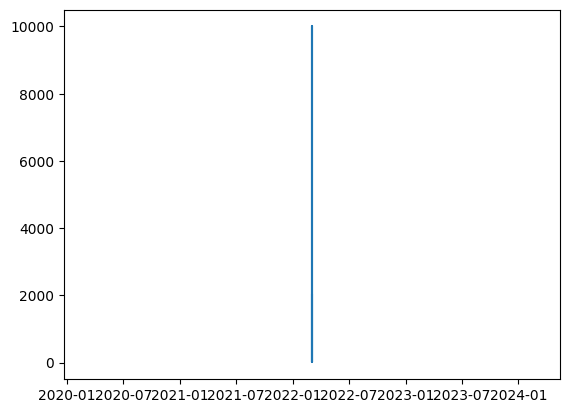

In [46]:
# plot graph
import matplotlib.pyplot as plt
plt.plot(df['Date'],df['INR'])

In [47]:
# Day wise bar chart/month wise bar chart
df['day_name']=df['Date'].dt.day_name()
df['day_name']

0      Wednesday
1      Wednesday
2      Wednesday
3      Wednesday
4      Wednesday
         ...    
272    Wednesday
273    Wednesday
274    Wednesday
275    Wednesday
276    Wednesday
Name: day_name, Length: 277, dtype: object

In [48]:
df.head(3)

,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1,day_name
0,2022-03-02 10:11:00,CUB - online payment,Food,NaN,Brownie,50.0,Expense,NaN,50.0,INR,50.0,Wednesday
1,2022-03-02 10:11:00,CUB - online payment,Other,NaN,To lended people,300.0,Expense,NaN,300.0,INR,300.0,Wednesday
2,2022-03-02 10:11:00,CUB - online payment,Food,NaN,Dinner,78.0,Expense,NaN,78.0,INR,78.0,Wednesday


<Axes: xlabel='day_name'>

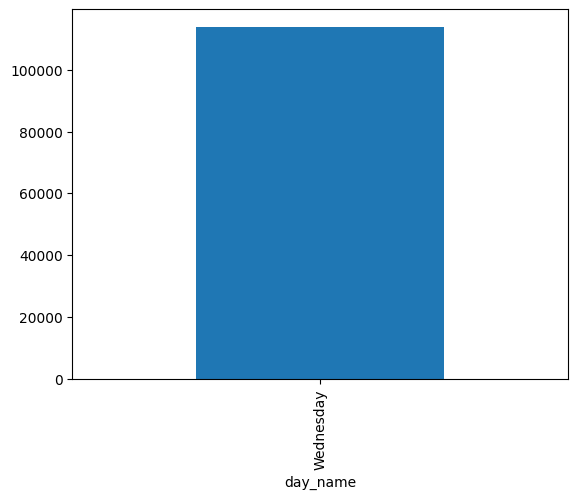

In [49]:
df.groupby('day_name')['INR'].sum().plot(kind='bar')